In [1]:
import sys
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import feature_detection
import utils

In [6]:
img_list = utils.load_images('../input_image/parrington')

In [13]:
cm = feature_detection.harris_corner(img_list[0])

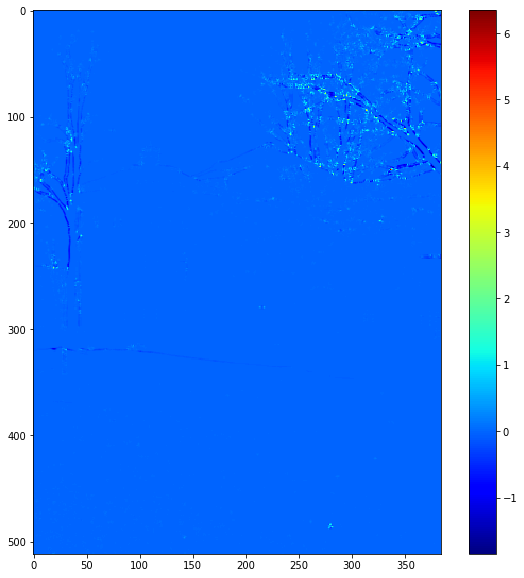

In [14]:
plt.figure(figsize=(10,10))
plt.imshow(cm, cmap='jet')
plt.colorbar()
plt.show()

In [95]:
def extract_description(img, corner_response, threshold=0.01):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    corner_neibor = np.zeros(shape=gray.shape, dtype=np.uint8)
    features = np.zeros(shape=gray.shape, dtype=np.uint8)
    features[corner_response > threshold*corner_response.max()] = 255
    
    #plt.figure(figsize=(10,10))
    #plt.imshow(features, cmap='gray')
    #plt.colorbar()
    #plt.show()
    
    feature_descriptions = np.array([[0,0,0,0,0,0,0,0,0]])
    
    height, width, _ = img.shape
    for y in range(1, height-1):
        for x in range(1, width-1):
            if features[y][x] == 255:
                desc = gray[y-1:y+2, x-1:x+2]
                corner_neibor[y-1:y+2, x-1:x+2] = desc
                feature_descriptions = np.append(feature_descriptions, [desc.flatten()], axis=0)
                
    return feature_descriptions[1:], corner_neibor
                

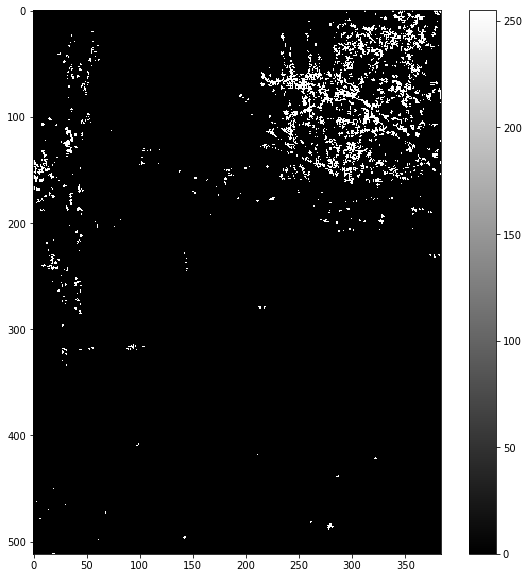

In [96]:
descs, n = extract_description(img_list[0], cm)

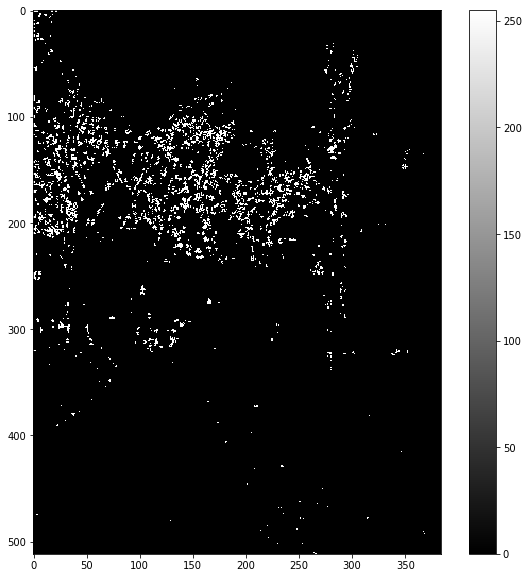

In [99]:
cm2 = feature_detection.harris_corner(img_list[1])
descs2, n2 = extract_description(img_list[1], cm2)

In [93]:
a = np.array([[1,2],[3,4]])
a[0:2,0:2] = [[3,2],[5,5]]

In [94]:
a

array([[3, 2],
       [5, 5]])

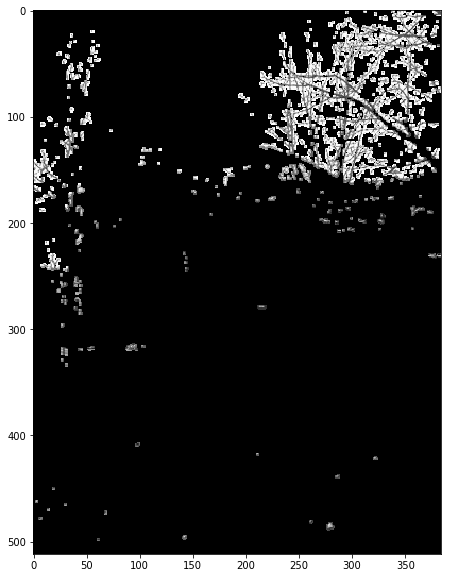

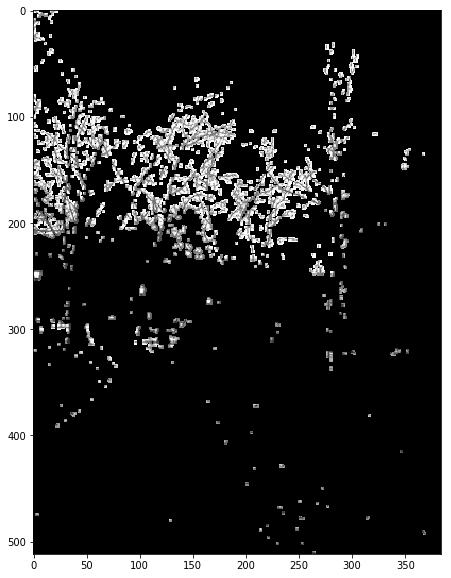

In [103]:
plt.figure(figsize=(10,10))
plt.imshow(n, cmap='gray')
plt.show()
plt.figure(figsize=(10,10))
plt.imshow(n2, cmap='gray')
plt.show()

In [16]:
def cylindrical_projection(img, focal_length):
    height, width, _ = img.shape
    cylinder_proj = np.zeros(shape=img.shape, dtype=np.uint8)
    
    for y in range(-int(height/2), int(height/2)):
        for x in range(-int(width/2), int(width/2)):
            cylinder_x = focal_length*math.atan(x/focal_length)
            cylinder_y = focal_length*y/math.sqrt(x**2+focal_length**2)
            
            cylinder_x = round(cylinder_x + width/2)
            cylinder_y = round(cylinder_y + height/2)
            #print(cylinder_x, cylinder_y)
            if cylinder_x >= 0 and cylinder_x < width and cylinder_y >= 0 and cylinder_y < height:
                cylinder_proj[cylinder_y][cylinder_x] = img[y+int(height/2)][x+int(width/2)]
    
    
    _, thresh = cv2.threshold(cv2.cvtColor(cylinder_proj, cv2.COLOR_BGR2GRAY), 1, 255, cv2.THRESH_BINARY)
    contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    x, y, w, h = cv2.boundingRect(contours[0])
    
    #plt.figure(figsize=(10,10))
    #plt.imshow(thresh)
    #plt.show()
    
    return cylinder_proj[y:y+h,x:x+w]

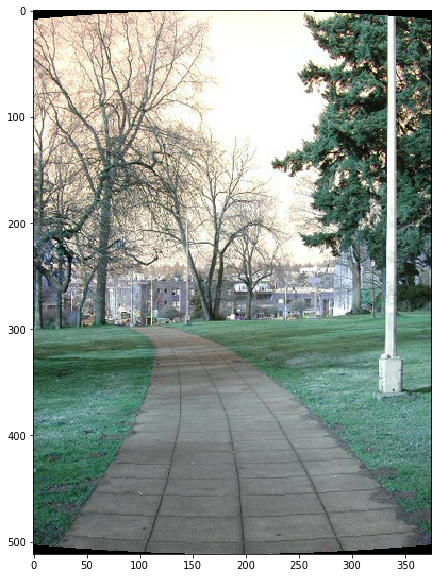

In [17]:
cc = cylindrical_projection(img_list[13],706.469)
plt.figure(figsize=(10,10))
plt.imshow(cc)
plt.show()